# <center> Natural Language Processing </center>
### <center> Problem Statement 5 </center>
## <center> Group 26 </center>

|     | BITS ID     | Name                              | Contribution |
| --- | ----------- | --------------------------------- | ------------ |
| 1   |             | KARTHIKEYAN J                     | 100%         |
| 2   | 2024AA05187 | JANGALE SAVEDANA SUBHASH PRATIBHA | 100%         |
| 3   | 2024AA05188 | GANAPATHY SUBRAMANIAN S           | 100%         |
| 4   |             | ANANDAN A                         | 100%         |
| 5   |             | ANUSHKA SHARMA                    | 100%         |

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Amazon Cell Phone reviews.csv to Amazon Cell Phone reviews.csv


In [4]:
import pandas as pd

df = pd.read_csv('Amazon Cell Phone reviews.csv')

In [5]:
print(df.head(5))

         asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3 

In [6]:
import nltk
nltk.download('stopwords')        # For stopword removal

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## 1. Data Preprocessing

### a) Cleaning: Remove all punctuation, numbers, and special characters from the dataset. Eliminate commonly used stop words

In [8]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['full_review'] = df['title'].fillna('') + ' ' + df['body'].fillna('')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation, numbers, special chars
    text = text.lower()  # Lowercase
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Clean the full_review column
df['cleaned_review'] = df['full_review'].apply(clean_text)

# Show result
print(df[['title', 'body', 'cleaned_review']].head())

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  \
0  I had the Samsung A600 for awhile which is abs...   
1  Due to a software issue between Nokia and Spri...   
2  This is a great, reliable phone. I also purcha...   
3  I love the phone and all, because I really did...   
4  The phone has been great for every purpose it ...   

                                      cleaned_review  
0  def best worst samsung awhile absolute doo doo...  
1  text messaging doesnt work due software issue ...  
2  love phone great reliable phone also purchased...  
3  love phone love phone really need one didnt ex...  
4  great phone service options lousy case phone g...  


In [9]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### b) Normalization: Apply stemming or lemmatization techniques to convert words to their base or root forms.

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation, numbers
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the function
df['cleaned_review'] = df['full_review'].apply(clean_and_lemmatize)

# Display results
print(df[['title', 'body', 'cleaned_review']].head())

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  \
0  I had the Samsung A600 for awhile which is abs...   
1  Due to a software issue between Nokia and Spri...   
2  This is a great, reliable phone. I also purcha...   
3  I love the phone and all, because I really did...   
4  The phone has been great for every purpose it ...   

                                      cleaned_review  
0  def best worst samsung awhile absolute doo doo...  
1  text messaging doesnt work due software issue ...  
2  love phone great reliable phone also purchased...  
3  love phone love phone really need one didnt ex...  
4  great phone service option lousy case phone gr...  


In [11]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def clean_and_Stemming(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation, numbers
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the function
df['cleaned_review'] = df['full_review'].apply(clean_and_Stemming)

# Display results
print(df[['title', 'body', 'cleaned_review']].head())

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  \
0  I had the Samsung A600 for awhile which is abs...   
1  Due to a software issue between Nokia and Spri...   
2  This is a great, reliable phone. I also purcha...   
3  I love the phone and all, because I really did...   
4  The phone has been great for every purpose it ...   

                                      cleaned_review  
0  def best worst samsung awhil absolut doo doo r...  
1  text messag doesnt work due softwar issu nokia...  
2  love phone great reliabl phone also purchas ph...  
3  love phone love phone realli need one didnt ex...  
4  great phone servic option lousi case phone gre...  


## 2. POS Tagging and Frequency Analysis

In [12]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

### Use a POS tagging algorithm to label each word in the dataset.

### a) Compute the frequency of each POS tag throughout the dataset.
### b) Identify and display the most frequently occurring POS tags along with their counts.
### c) Extract and print sentences that contain selected POS tags (e.g., nouns, verbs).

In [13]:
from nltk import word_tokenize, pos_tag
from collections import Counter

# Tokenize and tag each review
def get_pos_tags(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

# Apply POS tagging
df['pos_tags'] = df['full_review'].apply(get_pos_tags)

# a) Compute frequency of each POS tag
pos_counts = Counter()
for tags in df['pos_tags']:
    pos_only = [tag for word, tag in tags]
    pos_counts.update(pos_only)

# b) Most frequently occurring POS tags
top_pos_tags = pos_counts.most_common(10)
print("Top POS tags and their counts:")
for tag, count in top_pos_tags:
    print(f"{tag}: {count}")

# c) Extract sentences containing selected POS tags (e.g., nouns and verbs)
noun_tags = [tag for tag in pos_counts if re.match(r'^NN', tag)]
verb_tags = [tag for tag in pos_counts if re.match(r'^VB', tag)]
selected_tags = set(noun_tags + verb_tags)
# selected_tags = {'NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
sentences_with_selected_tags = []

for index, row in df.iterrows():
    tagged = row['pos_tags']
    if any(tag in selected_tags for _, tag in tagged):
        sentences_with_selected_tags.append(row['full_review'])

# Show a few matching sentences
print("\nSample sentences containing selected POS tags (nouns or verbs):\n")
for sent in sentences_with_selected_tags[:5]:
    print("-", sent)

Top POS tags and their counts:
NN: 19765
DT: 12637
IN: 11628
PRP: 10207
JJ: 9669
RB: 8914
.: 8223
NNP: 7493
VB: 5875
VBD: 5142

Sample sentences containing selected POS tags (nouns or verbs):

- Def not best, but not worst I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the p

In [14]:
import sys
!{sys.executable} -m pip install wordcloud

## 3. Visualization

### Generate visual representations to support your POS analysis:

### a. A bar chart to display POS tag frequencies
### b. A word cloud to highlight frequently used words

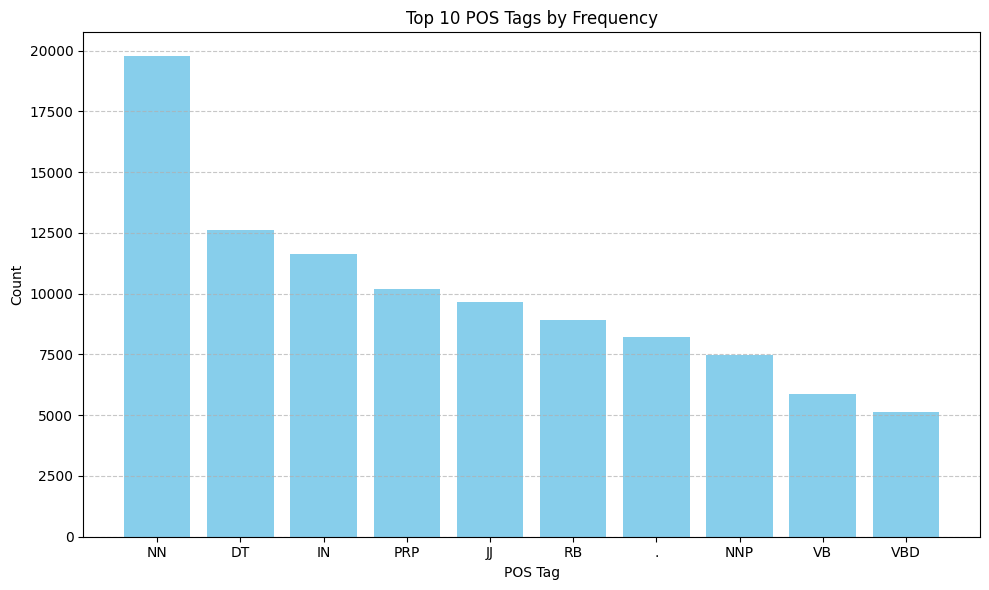

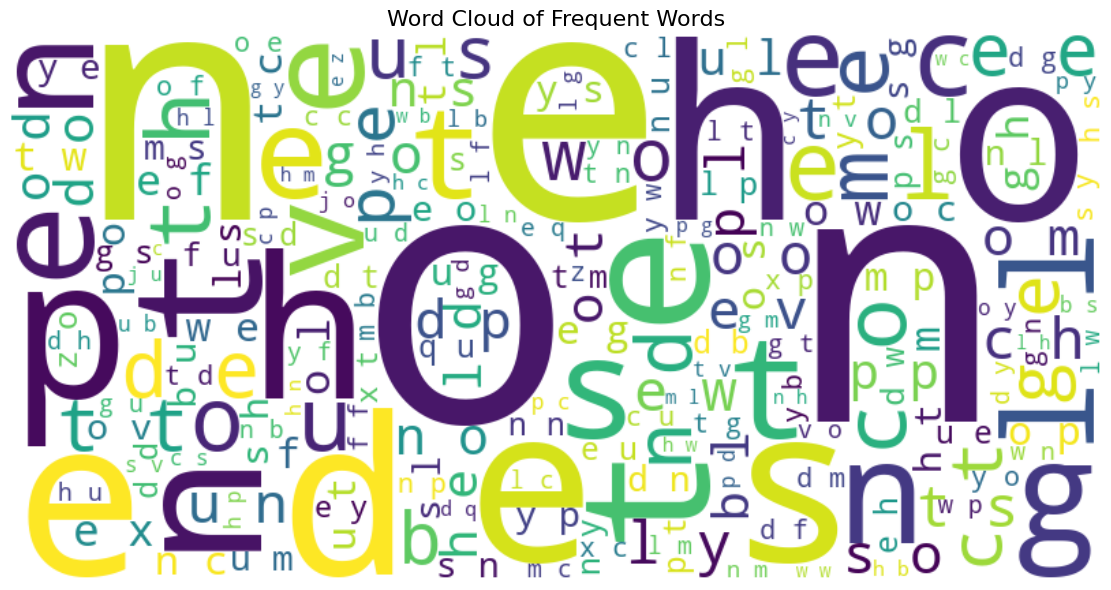

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Collect words and POS tags
all_words = []
all_tags = Counter()

for review in df['full_review']:
    tokens = word_tokenize(review)
    tags = pos_tag(tokens)
    all_tags.update(tag for word, tag in tags)
    all_words.extend(clean_text(review))

# a. Bar Chart of POS Tag Frequencies
top_tags = all_tags.most_common(10)
tags, counts = zip(*top_tags)

plt.figure(figsize=(10, 6))
plt.bar(tags, counts, color='skyblue')
plt.title('Top 10 POS Tags by Frequency')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# b. Word Cloud
wordcloud_text = ' '.join(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words', fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
from nltk.corpus import treebank
from nltk.tag.hmm import HiddenMarkovModelTrainer

nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

## 4. HMM POS Tagging

### Apply a Hidden Markov Model-based POS tagging approach to the first four rows of the dataset and display the results.

In [17]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Load and prepare training data from Treebank
train_data = treebank.tagged_sents()

# Train HMM POS tagger
trainer = HiddenMarkovModelTrainer()
hmm_tagger = trainer.train_supervised(train_data)

# Select first 4 rows
sample_reviews = df['full_review'].head(4)

# Tokenize and tag each review using HMM tagger
for i, review in enumerate(sample_reviews, start=1):
    tokens = word_tokenize(review)
    tagged = hmm_tagger.tag(tokens)
    print(f"\nReview {i} POS Tags (HMM):")
    print(tagged)


Review 1 POS Tags (HMM):
[('Def', 'NNP'), ('not', 'NNP'), ('best', 'NNP'), (',', 'NNP'), ('but', 'NNP'), ('not', 'NNP'), ('worst', 'NNP'), ('I', 'NNP'), ('had', 'NNP'), ('the', 'NNP'), ('Samsung', 'NNP'), ('A600', 'NNP'), ('for', 'NNP'), ('awhile', 'NNP'), ('which', 'NNP'), ('is', 'NNP'), ('absolute', 'NNP'), ('doo', 'NNP'), ('doo', 'NNP'), ('.', 'NNP'), ('You', 'NNP'), ('can', 'NNP'), ('read', 'NNP'), ('my', 'NNP'), ('review', 'NNP'), ('on', 'NNP'), ('it', 'NNP'), ('and', 'NNP'), ('detect', 'NNP'), ('my', 'NNP'), ('rage', 'NNP'), ('at', 'NNP'), ('the', 'NNP'), ('stupid', 'NNP'), ('thing', 'NNP'), ('.', 'NNP'), ('It', 'NNP'), ('finally', 'NNP'), ('died', 'NNP'), ('on', 'NNP'), ('me', 'NNP'), ('so', 'NNP'), ('I', 'NNP'), ('used', 'NNP'), ('this', 'NNP'), ('Nokia', 'NNP'), ('phone', 'NNP'), ('I', 'NNP'), ('bought', 'NNP'), ('in', 'NNP'), ('a', 'NNP'), ('garage', 'NNP'), ('sale', 'NNP'), ('for', 'NNP'), ('$', 'NNP'), ('1', 'NNP'), ('.', 'NNP'), ('I', 'NNP'), ('wonder', 'NNP'), ('y', 'NNP

## 5. POS and NER Integration

### a) Select a few representative sentences and annotate each word with both its POS tag and Named Entity Recognition (NER) label.

### b) Identify examples where POS and NER tags either contradict or complement one another. Explain how this relationship can be leveraged to improve the quality of text analysis.


In [22]:
from nltk import ne_chunk
from nltk.tree import Tree

nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [23]:
df = df.dropna(subset=['body'])

sample_sentences = df['body'].dropna().sample(4, random_state=42).tolist()

def extract_pos_ner(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    ner_tree = ne_chunk(pos_tags)

    annotations = []
    for chunk in ner_tree:
        if isinstance(chunk, Tree):  # Named Entity
            ne_label = chunk.label()
            for token, pos in chunk:
                annotations.append((token, pos, ne_label))
        else:
            token, pos = chunk
            annotations.append((token, pos, 'O'))  # No entity

    return annotations

for sent in sample_sentences:
    print(f"\n📌 Review Sample:\n{sent}\n")
    print(f"{'Token':12} {'POS':6} {'NER':12}")
    print("-" * 30)
    for word, pos, ner in extract_pos_ner(sent):
        print(f"{word:12} {pos:6} {ner:12}")


📌 Review Sample:
Definitely was able to use this phone for awhile.

Token        POS    NER         
------------------------------
Definitely   RB     O           
was          VBD    O           
able         JJ     O           
to           TO     O           
use          VB     O           
this         DT     O           
phone        NN     O           
for          IN     O           
awhile       NN     O           
.            .      O           

📌 Review Sample:
We received the phone only to discover the charger did not fit into phone. We had to immediately buy a new charger at Verizon. The following day the rubber lid placed on side of phone fell off. After searching for it for hours in vain.... we placed a strip of electricians tape over one inch opening. It is an opening showing intricate metal parts that should be protected from debris. On a final note we are not going to buy a used phone ever again.

Token        POS    NER         
------------------------------
We 

### POS tag NNP (Proper Noun, Singular) agrees with NER as a named organization.

### POS tag NN (common noun) misclassifies what should be NNP, but NER correctly identifies the entity.

### This disagreement reveals NER can enrich POS tagging.

| Case                     | Insight                                                       |
|--------------------------|---------------------------------------------------------------|
| POS is right, NER is wrong | Improve NER by using POS clues (e.g., NNP = likely entity)     |
| NER is right, POS is wrong | Fix POS tag using NER information                             |
| Both agree               | High confidence annotation                                     |
| Both disagree            | Candidate for review / active learning                         |
